In [27]:
# -*- coding: utf-8 -*-
## Exemplo de Criação de um modelo de Previsão/Classificação usando as Arvores de Decisão
## Example of Creating a Forecast/Classification model using Decision Trees

## import
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

## carregar o ficheiro Insol para um dataframe do pandas dInsol
## load the Insol file into a pandas dInsol dataframe
dInsol = pd.read_csv('crimes-19-m.csv',sep=',',header=0, low_memory=False)

dInsol = dInsol.fillna(0)

dInsol.head(2)     #Mostra as primeiras n linhas do conjunto de dados
dInsol.tail(5)     #Mostra as últimas n linhas do conjunto de dados

,IUCR,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,Year
99995,495,0,1,1,921,9,15.0,58.0,2019
99996,820,0,1,1,726,7,16.0,67.0,2019
99997,2024,0,0,1,1022,10,24.0,29.0,2019
99998,820,0,1,1,524,5,34.0,53.0,2019
99999,320,0,1,1,1222,12,27.0,27.0,2019


In [28]:

## Pre-processamento dividir os dados em conjunto de Treino e Teste
## Pre-processing split data into Training and Test sets
x = dInsol.drop('Arrest' ,axis=1)   #Todas as tabelas que são usadas para fazer a predict
y = dInsol.Arrest                   #Resultados entre 1 e 0 8Insolvência ou não Insolvênvia)

## Function train_test_split
x_train, x_teste, y_train, y_teste = train_test_split(x, y, test_size=0.50, random_state=18)

## Treinar o modelo
## Train the model
DecisionTree_Class_Model = DecisionTreeClassifier()
DecisionTree_Class_Model.fit(x_train, y_train)



DecisionTreeClassifier()

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.099195 to fit


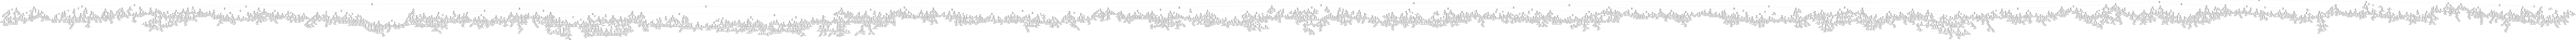

In [29]:
##Previsao/Forecasting
y_pred = DecisionTree_Class_Model.predict(x_teste)
y_pred

##Accuracy Score
accuracy = metrics.accuracy_score(y_teste, y_pred)
accuracy

##Matriz da confusão
from sklearn.metrics import confusion_matrix

pd.DataFrame(
    confusion_matrix(y_teste, y_pred),
    columns=['Previsão de Prisão', 'Previsão de Não Prisão'],
    index=['Realidade de Prisão', 'Realidade de Não Prisão']
)

from sklearn import tree

model = tree.DecisionTreeClassifier()
model.fit(x_train, y_train)

tree.export_graphviz(model, out_file='tree.dot', feature_names=x.columns)
from subprocess import call

call(['dot', '-T', 'png', 'tree.dot', '-o', 'tree.png'])

from IPython.display import Image
Image(filename = 'tree.png')





In [30]:
##Guardar o modelo num ficheiro com o pickle
##Save the model to a file with pickle
import pickle

filename = 'modelo_final.sav'
pickle.dump(model, open(filename, 'wb'))

In [31]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(x_teste, y_teste)
print(result)

#Fazer uma previsão
# make a prediction
import pickle
loaded_model = pickle.load(open('modelo_final.sav', 'rb'))    #Importar o modelo guardado #Import the saved model

dNew = pd.read_csv('crimes-novo.csv',sep=',',header=0)
dNew = dNew.drop('Arrest', axis=1)   #Remover a tabela Insolvencia  #Remove the Insolvency table
dNew.head(2)     #Mostra as primeiras n linhas do conjunto de dados   Display the first n rows of the dataset 



0.85742


,IUCR,Location Description,Domestic,Beat,District,Ward,Community Area,Year
0,1153,0,1,412,4,8,45,2022


In [32]:
yNew = pd.Series(loaded_model.predict(dNew))
if yNew[0] == 0:
  print("Probabilidade de Não Ser Preso, Probabilidade=%s" % (yNew[0]))
else:
   print("Probabilidade de Ser Preso, Probabilidade=%s" % (yNew[0]))

Probabilidade de Ser Preso, Probabilidade=1
